<a href="https://colab.research.google.com/github/ssreeramj/ml-algos-from-scratch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [85]:
X, y = make_classification(n_samples=1000, random_state=3011)

In [86]:
X.shape, y.shape

((1000, 20), (1000,))

In [87]:
np.unique(y, return_counts=True)

(array([0, 1]), array([499, 501]))

In [88]:
lr = LogisticRegression()
lr.fit(X, y)
actual_coeffs = lr.coef_.ravel()
actual_coeffs

array([-0.13593246, -0.06011908, -0.06294293, -0.82165516, -0.03792018,
       -0.04370882,  0.03601854, -0.03944616, -0.24047265, -0.09992641,
        0.28208629, -0.1533509 , -0.18382631,  0.06181412, -0.17694004,
        0.10614264,  0.11150321,  0.47752867,  2.78936366, -0.04953238])

## Logistic Regression

- we calculate the coefficients by maximizing the likelihood.
- likelihood = p(x) ^ y (1 - p(x)) ^ (1-y)
- p(x) = 1 / (1 + e^-x)
- x = B0 + B1X

In [89]:
# prompt: write function to calculate sigmoid

def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [90]:
class CustomLogisticRegression():
    def __init__(self, n_iter=1000, alpha=0.001):
        self.n_iter = n_iter
        self.alpha = alpha
        self.log_loss = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _log_loss(self, x, y):
        xx = np.dot(X, self.coeffs) # shape => (N, 1)
        sig_xx = self._sigmoid(xx)
        ll = -(np.multiply(y, np.log(sig_xx)) + np.multiply(1-y, 1 - np.log(sig_xx)))
        return ll


    def fit(self, X, y):
        N, n_vars = X.shape
        y = y.reshape(-1, 1)

        self.coeffs = np.random.randn(n_vars, 1)

        for _ in range(self.n_iter):
            xx = np.dot(X, self.coeffs) # shape => (N, 1)
            log_loss = self._log_loss(X, y).mean()

            self.log_loss.append(log_loss)
            gradients = np.dot(X.T, y - self._sigmoid(xx)) / N
            self.coeffs += gradients


    def predict(self, X):
        return self._sigmoid(np.dot(X, self.coeffs))


In [91]:
lr = CustomLogisticRegression(n_iter=1000)
lr.fit(X, y)

In [92]:
model_coeffs = lr.coeffs.ravel()

print(f"Actual Coefficients: {actual_coeffs}")
print(f"Model Coefficients: {model_coeffs}")

Actual Coefficients: [-0.13593246 -0.06011908 -0.06294293 -0.82165516 -0.03792018 -0.04370882
  0.03601854 -0.03944616 -0.24047265 -0.09992641  0.28208629 -0.1533509
 -0.18382631  0.06181412 -0.17694004  0.10614264  0.11150321  0.47752867
  2.78936366 -0.04953238]
Model Coefficients: [-0.14666731 -0.06119872 -0.06885295 -0.50333228 -0.04014312 -0.03867918
  0.03873334 -0.03945128 -0.253382   -0.11007066 -0.1031353  -0.15967334
 -0.19380331  0.07117665 -0.18652246  0.1094835   0.11874228  0.32601968
  3.07307953 -0.0510219 ]


Actual coefficients are close to our models coefficients!

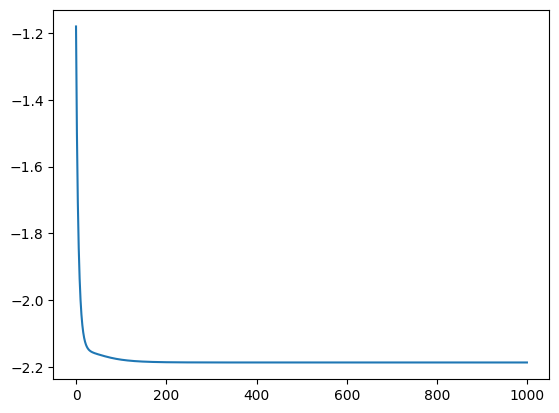

In [93]:
# plot errors
plt.plot(lr.log_loss)
plt.show()

In [94]:
y_probs = lr.predict(X)
y_preds = np.where(y_probs > 0.5, 1, 0)
accuracy_score(y, y_preds)

0.919